In [82]:
import pandas as pd
df1 = pd.read_csv("./data/model_results_1.csv")
df2 = pd.read_csv("./data/model_results_2.csv")
df = pd.concat([df1, df2]).reset_index(drop=True)
print('Total Results ', df.shape)
df.head(3)

Total Results  (110, 11)


,model_name,mse,rmse,mae,added_date,feature,time_taken,learning_rate,epochs,stock_ids,stock_ids_count
0,MLP,24.886909,4.988678,4.977979,2023-07-31 16:23:34.850079,rv_lags,1.447764,0.0020,2,[0],1
1,CNN,0.009210,0.095970,0.094566,2023-07-31 16:23:37.274713,rv_lags,2.423859,0.0001,2,[0],1
2,TCN,0.006502,0.080636,0.053498,2023-07-31 16:23:54.702476,rv_lags,17.419547,0.0100,2,[0],1


In [68]:
df.sort_values(by=["rmse"], ascending=True)

,model_name,mse,rmse,mae,added_date,feature,time_taken,learning_rate,epochs,stock_ids,stock_ids_count
70,MLP,0.000719,0.026805,0.023581,2023-08-01 12:59:25.981407,log_return,1.169048,0.0020,2,"[0, 1, 2, 3, 4]",5
80,MLP,0.000776,0.027858,0.021850,2023-08-01 13:26:21.326337,log_return_spread_and_statistics_features,1.196718,0.0020,2,"[0, 1, 2, 3, 4]",5
105,MLP,0.000825,0.028730,0.023531,2023-08-01 14:58:28.653801,all_nn_features,1.352145,0.0020,2,"[0, 1, 2, 3, 4]",5
95,MLP,0.000886,0.029761,0.020239,2023-08-01 14:11:40.245990,size_nn_features,1.578000,0.0020,2,"[0, 1, 2, 3, 4]",5
90,MLP,0.001120,0.033470,0.028367,2023-08-01 13:55:15.299353,volume_nn_features,1.467032,0.0020,2,"[0, 1, 2, 3, 4]",5
...,...,...,...,...,...,...,...,...,...,...,...
20,MLP,2.011677,1.418336,1.413934,2023-07-31 16:29:36.645042,rv_lags,1.860136,0.0020,2,"[0, 1]",2
5,MLP,4.308519,2.075697,1.988838,2023-07-31 16:25:07.279714,log_return,1.407761,0.0020,2,[0],1
81,CNN,4.684013,2.164258,2.156519,2023-08-01 13:26:25.579504,log_return_spread_and_statistics_features,4.252494,0.0001,2,"[0, 1, 2, 3, 4]",5
71,CNN,11.337264,3.367085,3.328756,2023-08-01 12:59:30.083601,log_return,4.101581,0.0001,2,"[0, 1, 2, 3, 4]",5


In [69]:
def get_unique_col_elements(df_u: pd.DataFrame, col_name: str):
    return list(df_u[col_name].unique())

def get_filtered_data(df_filt: pd.DataFrame, col_name: str, col_value: any) -> pd.DataFrame:
    return df_filt[df_filt[col_name] == col_value].sort_values(by=["rmse"], ascending=True)

def get_best_model_from_group(df_best: pd.DataFrame, col_name: str) -> pd.DataFrame:
    return df_best.loc[df_best.groupby(col_name).rmse.idxmin()].sort_values(by=['rmse']).reset_index(drop=True)

In [81]:
# 1. Number of stocks used in the experiments
number_of_stocks = get_unique_col_elements(df, 'stock_ids_count')
number_of_stocks

[1, 2, 5]

In [71]:
# 2. Features sets used
features = get_unique_col_elements(df, 'feature')
features

['rv_lags',
 'log_return',
 'log_return_and_spread_features',
 'log_return_spread_and_statistics_features',
 'price_nn_features',
 'volume_nn_features',
 'size_nn_features',
 'random_nn_features',
 'all_nn_features']

In [72]:
# 3. Type of Models used
models = get_unique_col_elements(df, 'model_name')
models

['MLP', 'CNN', 'TCN', 'LSTM', 'Transformer']

In [73]:

df_model = get_filtered_data(df, 'model_name', 'CNN')
df_model

,model_name,mse,rmse,mae,added_date,feature,time_taken,learning_rate,epochs,stock_ids,stock_ids_count
41,CNN,0.004319,0.065721,0.049686,2023-07-31 16:48:10.790460,price_nn_features,3.336227,0.0001,2,"[0, 1]",2
6,CNN,0.005293,0.072754,0.059782,2023-07-31 16:25:08.747776,log_return,1.467490,0.0001,2,[0],1
31,CNN,0.008128,0.090153,0.077828,2023-07-31 16:38:52.366413,log_return_and_spread_features,2.155159,0.0001,2,"[0, 1]",2
1,CNN,0.009210,0.095970,0.094566,2023-07-31 16:23:37.274713,rv_lags,2.423859,0.0001,2,[0],1
16,CNN,0.015112,0.122932,0.117570,2023-07-31 16:28:11.064299,log_return_spread_and_statistics_features,1.428614,0.0001,2,[0],1
56,CNN,0.019272,0.138823,0.133251,2023-07-31 17:03:18.898155,random_nn_features,5.139106,0.0001,2,"[0, 1]",2
91,CNN,0.026791,0.163680,0.136615,2023-08-01 13:55:20.079591,volume_nn_features,4.779393,0.0001,2,"[0, 1, 2, 3, 4]",5
61,CNN,0.030842,0.175619,0.171816,2023-07-31 17:08:26.125927,all_nn_features,3.611148,0.0001,2,"[0, 1]",2
11,CNN,0.043377,0.208273,0.206708,2023-07-31 16:26:38.271292,log_return_and_spread_features,1.435308,0.0001,2,[0],1
106,CNN,0.047741,0.218498,0.189081,2023-08-01 14:58:33.278232,all_nn_features,4.623288,0.0001,2,"[0, 1, 2, 3, 4]",5


In [74]:
get_best_model_from_group(df, 'model_name')

,model_name,mse,rmse,mae,added_date,feature,time_taken,learning_rate,epochs,stock_ids,stock_ids_count
0,MLP,0.000719,0.026805,0.023581,2023-08-01 12:59:25.981407,log_return,1.169048,0.0020,2,"[0, 1, 2, 3, 4]",5
1,LSTM,0.003129,0.055942,0.043194,2023-07-31 16:25:33.780106,log_return,9.165243,0.0020,2,[0],1
2,CNN,0.004319,0.065721,0.049686,2023-07-31 16:48:10.790460,price_nn_features,3.336227,0.0001,2,"[0, 1]",2
3,TCN,0.005321,0.072948,0.046611,2023-07-31 16:25:24.607327,log_return,15.851400,0.0100,2,[0],1
4,Transformer,0.006363,0.079768,0.053211,2023-07-31 16:28:03.444481,log_return_and_spread_features,59.965008,0.0010,2,[0],1


In [78]:
get_best_model_from_group(df, 'feature')

,model_name,mse,rmse,mae,added_date,feature,time_taken,learning_rate,epochs,stock_ids,stock_ids_count
0,MLP,0.000719,0.026805,0.023581,2023-08-01 12:59:25.981407,log_return,1.169048,0.002,2,"[0, 1, 2, 3, 4]",5
1,MLP,0.000776,0.027858,0.021850,2023-08-01 13:26:21.326337,log_return_spread_and_statistics_features,1.196718,0.002,2,"[0, 1, 2, 3, 4]",5
2,MLP,0.000825,0.028730,0.023531,2023-08-01 14:58:28.653801,all_nn_features,1.352145,0.002,2,"[0, 1, 2, 3, 4]",5
3,MLP,0.000886,0.029761,0.020239,2023-08-01 14:11:40.245990,size_nn_features,1.578000,0.002,2,"[0, 1, 2, 3, 4]",5
4,MLP,0.001120,0.033470,0.028367,2023-08-01 13:55:15.299353,volume_nn_features,1.467032,0.002,2,"[0, 1, 2, 3, 4]",5
5,MLP,0.001189,0.034478,0.026141,2023-08-01 13:40:01.863190,price_nn_features,1.811285,0.002,2,"[0, 1, 2, 3, 4]",5
6,LSTM,0.004168,0.064561,0.051400,2023-07-31 16:27:03.461307,log_return_and_spread_features,9.248746,0.002,2,[0],1
7,MLP,0.005033,0.070941,0.047510,2023-07-31 17:03:13.758319,random_nn_features,1.768690,0.002,2,"[0, 1]",2
8,TCN,0.006502,0.080636,0.053498,2023-07-31 16:23:54.702476,rv_lags,17.419547,0.010,2,[0],1


In [79]:
get_best_model_from_group(df, 'stock_ids_count')

,model_name,mse,rmse,mae,added_date,feature,time_taken,learning_rate,epochs,stock_ids,stock_ids_count
0,MLP,0.000719,0.026805,0.023581,2023-08-01 12:59:25.981407,log_return,1.169048,0.002,2,"[0, 1, 2, 3, 4]",5
1,MLP,0.002467,0.049669,0.032159,2023-07-31 17:08:22.514057,all_nn_features,0.950933,0.002,2,"[0, 1]",2
2,LSTM,0.003129,0.055942,0.043194,2023-07-31 16:25:33.780106,log_return,9.165243,0.002,2,[0],1


In [80]:
get_best_model_from_group(df, 'epochs')

,model_name,mse,rmse,mae,added_date,feature,time_taken,learning_rate,epochs,stock_ids,stock_ids_count
0,MLP,0.000719,0.026805,0.023581,2023-08-01 12:59:25.981407,log_return,1.169048,0.002,2,"[0, 1, 2, 3, 4]",5


In [41]:
# multiple stock results
import pandas as pd
import os
result_files = [f for f in os.listdir("./results/") if f.endswith(".csv")]
result_files
results_multiple_stocks = []
for file_id in result_files:
    # if file_id in ['03a13906-c7af-4d46-8a28-5e0e3f9164de.csv','b09c21d4-95e6-4cc7-88f4-05bb1f6b3f2b.csv']:
    #     continue
    result_file_path = './results/' + file_id
    df_results_stock = pd.read_csv(result_file_path).sort_values(by=["rmse"]).head(1)
    results_multiple_stocks.append({
        'model_name': df_results_stock['model_name'].values[0],
        'stock_ids_count': df_results_stock['stock_ids_count'].values[0],
        'rmse': df_results_stock['rmse'].values[0],
        'file_id': file_id
        })
    
results_multiple_stocks_df = pd.DataFrame(results_multiple_stocks).sort_values(by=['stock_ids_count'], ascending=True)
results_multiple_stocks_df
    

,model_name,stock_ids_count,rmse,file_id
6,MLP,1,0.012859,03a13906-c7af-4d46-8a28-5e0e3f9164de.csv
7,MLP,2,0.005027,b09c21d4-95e6-4cc7-88f4-05bb1f6b3f2b.csv
10,MLP,10,0.001863,3367fdda-ce55-44e6-8b1d-4e9cb01510db.csv
9,MLP,20,0.001456,8280f750-1ec2-4e25-bf5f-c1217677051a.csv
2,MLP,30,0.001524,69d6bb80-a082-46d1-b485-b59e7eb19a71.csv
4,MLP,40,0.001274,25db4daf-2121-4aa1-8e6d-4dd1197caa05.csv
0,MLP,50,0.001293,cec3671f-3723-49c7-8234-3dd4ec88279c.csv
3,MLP,60,0.001468,1bea4d4c-0974-4fbb-8b0a-f0be9f86591e.csv
1,MLP,70,0.001470,92f3fed6-0f94-4266-bbbe-508f366e7821.csv
5,MLP,80,0.001728,eb143c8b-09b1-40c5-bb3a-fe2092423605.csv


In [78]:
results_multiple_stocks_df.head(4)

,model_name,stock_ids_count,rmse,file_id
6,MLP,1,0.012859,03a13906-c7af-4d46-8a28-5e0e3f9164de.csv
7,MLP,2,0.005027,b09c21d4-95e6-4cc7-88f4-05bb1f6b3f2b.csv
10,MLP,10,0.001863,3367fdda-ce55-44e6-8b1d-4e9cb01510db.csv
9,MLP,20,0.001456,8280f750-1ec2-4e25-bf5f-c1217677051a.csv


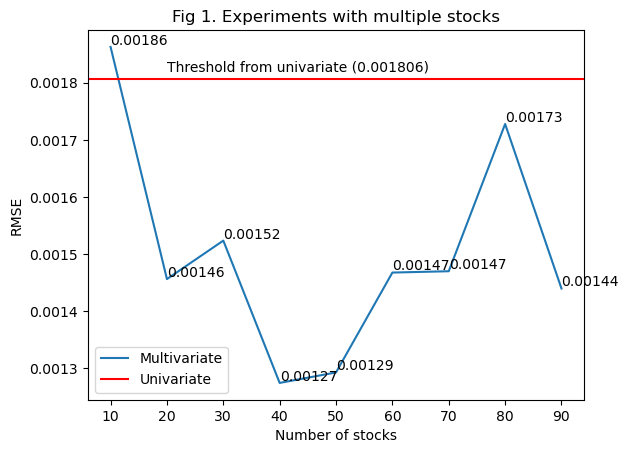

In [84]:
import matplotlib.pyplot as plt

def draw_results_stock_count_plot(x,y):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    line, = plt.plot(x, y)
    # plt.margins(x=0, y=0)
    plt.xticks(x)
    plt.axhline(y=0.001806, color='r', linestyle='-', label="Univariate")
    line.set_label("Multivariate")
    plt.legend()

    for i,j in zip(x,y):
        ax.annotate(str(round(j,5)), xy=(i,j + 0.000004))

    ax.annotate('Threshold from univariate (0.001806)', xy=(20, 0.00182))
    plt.xlabel('Number of stocks')
    plt.ylabel('RMSE')
    plt.title('Fig 1. Experiments with multiple stocks')
    plt.show()

x = results_multiple_stocks_df['stock_ids_count'][2:]
y = results_multiple_stocks_df['rmse'][2:]
draw_results_stock_count_plot(x,y)